In [2]:
conda install -c conda-forge xgboost=1.3.3

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - xgboost=1.3.3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    conda-4.12.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    libxgboost-1.3.3           |       h0e60522_2         2.1 MB  conda-forge
    py-xgboost-1.3.3           |   py39hcbf5309_2         124 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    xgboost-1.3.3              |   py39hcbf5309_2          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

T



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [3]:
conda install -c conda-forge lightgbm=3.1.1

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - lightgbm=3.1.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-3.1.1             |   py39h415ef7b_0         758 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         758 KB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/win-64::lightgbm-3.1.1-py39h415ef7b_0




lightgbm-3.1.1       | 758 KB    |            |   0% 
lightgbm-3.1.1       | 758 KB    | 2          |   2% 
lightgbm-3.1.1       | 758 KB    | ########   |  80% 
lightgbm-3.1.1       | 758 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying 



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda




In [4]:
conda install -c conda-forge missingno=0.4.2

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - missingno=0.4.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39hcbf5309_2         985 KB  conda-forge
    missingno-0.4.2            |             py_1          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         997 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/noarch::missingno-0.4.2-py_1

The following packages will be UPDATED:

  conda                               4.12.0-py39hcbf5309_0 --> 22.9.0-py39hcbf5309_2




missingno-0.4.2      | 12 KB     |            |   0% 
missingno-0.4.2      | 12 KB     | ########## | 100% 
missingno-0.4.2      | 12 KB     | ########## | 100% 

conda-

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = ('/Users/user/aiffel/project/kaggle-kakr-housing-data/data')

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [6]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

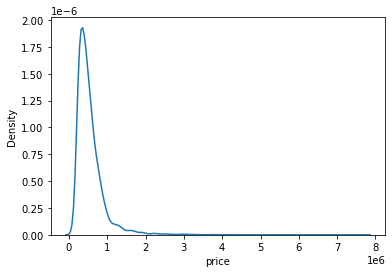

In [10]:
sns.kdeplot(y)
plt.show()

In [11]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

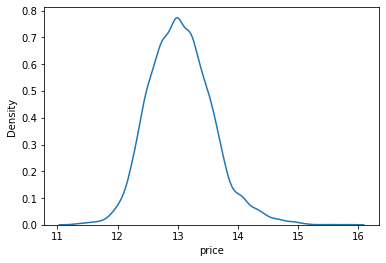

In [12]:
sns.kdeplot(y)
plt.show()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int32  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [14]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=5)
    grid_model.fit(train, y)
    
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results

In [15]:
random_state = 2020
param_grid = {
    'objective':['regression'],
    'learning_rate' : [0.05],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 10, 20, 30, 40, 50],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,learning_rate,max_depth,n_estimators,objective,score,RMSLE
4,0.05,10,500,regression,-0.025927,0.161020
5,0.05,10,1000,regression,-0.025930,0.161028
8,0.05,20,1000,regression,-0.026044,0.161381
14,0.05,40,1000,regression,-0.026047,0.161392
11,0.05,30,1000,regression,-0.026047,0.161392
17,0.05,50,1000,regression,-0.026047,0.161392
16,0.05,50,500,regression,-0.026054,0.161413
10,0.05,30,500,regression,-0.026054,0.161413
13,0.05,40,500,regression,-0.026054,0.161413
7,0.05,20,500,regression,-0.026067,0.161453


In [16]:
param_grid = {
    'learning_rate': [0.05],
    'subsample': [0.9],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10, 20, 30, 40, 50],
}

model = XGBRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


,learning_rate,max_depth,n_estimators,subsample,score,RMSLE
5,0.05,5,1000,0.9,-0.025476,0.159613
7,0.05,10,500,0.9,-0.025893,0.160913
8,0.05,10,1000,0.9,-0.025997,0.161236
4,0.05,5,500,0.9,-0.026010,0.161277
17,0.05,40,1000,0.9,-0.027226,0.165003
16,0.05,40,500,0.9,-0.027226,0.165003
20,0.05,50,1000,0.9,-0.027264,0.165119
19,0.05,50,500,0.9,-0.027264,0.165119
11,0.05,20,1000,0.9,-0.027273,0.165146
10,0.05,20,500,0.9,-0.027273,0.165147


In [17]:
param_grid = {
    'learning_rate': [0.05],
    'subsample': [0.9],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10, 20, 30, 40, 50],
}

model = GradientBoostingRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


,learning_rate,max_depth,n_estimators,subsample,score,RMSLE
5,0.05,5,1000,0.9,-0.025950,0.161091
4,0.05,5,500,0.9,-0.026374,0.162400
7,0.05,10,500,0.9,-0.028702,0.169416
8,0.05,10,1000,0.9,-0.028735,0.169515
6,0.05,10,100,0.9,-0.029241,0.170999
3,0.05,5,100,0.9,-0.031084,0.176306
11,0.05,20,1000,0.9,-0.034092,0.184640
10,0.05,20,500,0.9,-0.034092,0.184640
9,0.05,20,100,0.9,-0.034130,0.184744
17,0.05,40,1000,0.9,-0.034321,0.185259


In [18]:
param_grid = {
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10, 20, 30, 40, 50],
}

model = RandomForestRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


,max_depth,n_estimators,score,RMSLE
14,30,1000,-0.031366,0.177104
17,40,1000,-0.031368,0.177109
20,50,1000,-0.031368,0.177109
11,20,1000,-0.031383,0.177151
13,30,500,-0.031447,0.177332
16,40,500,-0.031456,0.177359
19,50,500,-0.031457,0.177360
10,20,500,-0.031460,0.177369
9,20,100,-0.031830,0.178410
15,40,100,-0.031854,0.178478
